# Excercise sheet 1

## Question 1

In [1]:
import re
import numpy as np
import scipy.optimize
import urllib.request
import random

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = list()
URL = "https://teachingfiles.blob.core.windows.net/founds/weblog_sizes.txt"
with urllib.request.urlopen(URL) as f:
    for line in f:
        data.append(int(line))

In [3]:
lg_x = np.log(np.sort(data))
lg_y = np.log(np.arange(len(data), 0, -1) / len(data))

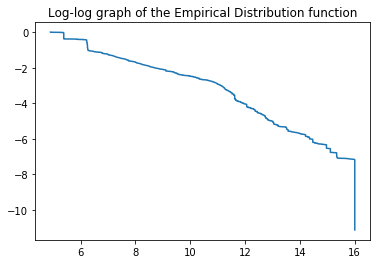

In [4]:
plt.plot(lg_x, lg_y)
plt.title("Log-log graph of the Empirical Distribution function")
plt.show()

In [5]:
def mle(param, x):
    beta, gamma, theta = param
    return -1*beta*x - gamma * np.maximum(x-theta, 0)

def loss(param):
    fx = mle(param, lg_x)
    return np.sum(np.square(lg_y - fx))

optimised = scipy.optimize.fmin(loss, x0=[random.random() for i in range(3)])
print(optimised)

Optimization terminated successfully.
         Current function value: 2334.046815
         Iterations: 168
         Function evaluations: 296
[ -1.53174735e-06   5.52343276e-01   4.99866409e+00]


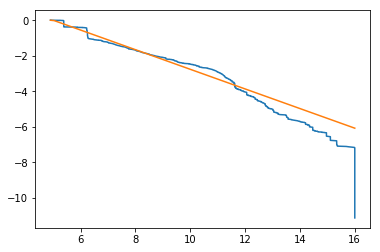

In [6]:
plt.plot(lg_x, lg_y, lg_x, mle(optimised,lg_x))
plt.show()

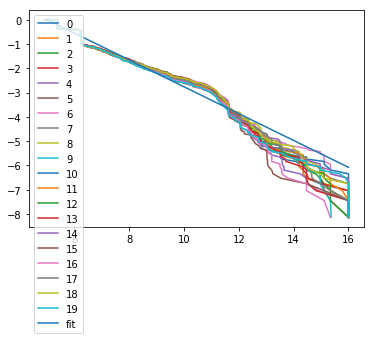

In [7]:
splits = [data[i::20] for i in range(20)]

for i in range(20):
    x = np.log(np.sort(splits[i]))
    y = np.log(np.arange(len(splits[i]), 0, -1) / len(splits[i]))
    
    plt.plot(x, y, label=i)
    
plt.plot(lg_x, mle(optimised,lg_x), label="fit")
plt.legend(loc="upper left")
plt.show()

## Question 2

In [8]:
import pandas

URL = "https://teachingfiles.blob.core.windows.net/founds/wasp.csv"
wasp_times = pandas.read_csv(urllib.request.urlopen(URL))
wasp_times = {k:v.values for k,v in wasp_times.items()}

(a) Plot the data in some appropriate way. For example, you could plot the number of wasps in every 10 second interval.

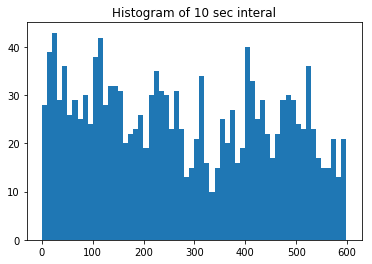

In [9]:
plt.hist(wasp_times['t_sec'],bins=60)
plt.title("Histogram of 10 sec interal")
plt.show()

For the rest of this question, restrict attention to day 1. Let x1,...,xnbe wasp inter-departure times, i.e. the first wasp departs at time $t[0]$, the second at $t[1]=t[0]+x1$, the third at $t[2]=t[1]+x2$ and so on. In many counting processes found in nature, the inter-event times are independent. We will investigate whether this is the case for the wasp dataset. This is so that I can properly quantify the variability in wasp activity, which will be important when I come to analyse whether wasp activity is becoming significantly worse, but that is a matter for another time.

(b) Compute the mean µ and variance σ2of wasp inter-departure times. Note: ‘mean’ and ‘variance’ are words for describing random variables, not datasets. You should interpret them in away that makes sense.


In [10]:
t = wasp_times['t_sec']
x = [t[i+1] - t[i] for i in range(len(t)-1)]

mu = np.mean(x)
var = np.var(x)

print("Mean: ", mu)
print("Variance: ", var)

Mean:  0.385553181519
Variance:  467.913502053


## Question 3

Since the probability is the difference between the two points where $U(1-U)$ and $y$ meet each other:

$$
U - U^2 = y \\
U^2 - U + y = 0 \\
U = 1 \pm \sqrt{1 - 4y}
$$

$$
U_2 - U_1 = \frac{2 \sqrt{1 - 4y}}{2} = \sqrt{1 - 4y}
$$
$$
\mathbb{P}(Y = y) =
$$
